In [1]:
# This cell is only used to suppress some distracting output messages
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import matplotlib.pyplot as plt
from cartopy import crs
from cartopy import feature as cfeature
from rich import print
import pandas as pd
import xarray as xr
from pathlib import Path
from datetime import datetime
from ipywidgets import IntProgress
from IPython.display import display
import fiona
import shapely.geometry
from pyproj import Geod

import ewatercycle.forcing
import ewatercycle.models
import ewatercycle.parameter_sets

In [3]:
# Chatly_station_latitude = 42.34332908492399  # Amu Darya near Chatly
# Chatly_station_longitude = 59.627516175820965 

Chatly_station_latitude = 42.34332908492399-0.5 # Amu Darya near Chatly
Chatly_station_longitude = 59.627516175820965+0.9    # Through trial and error, to get modelled discharge closer to observed

Kerki_station_latitude = 37.8396310038444 #Amu Darya near Kerki
Kerki_station_longitude = 65.23703868931334

#Tyumen_station_latitude = 44.01445789449254 # Syr Darya near Tyumen, google maps
#Tyumen_station_longitude = 67.02866313732494

#Tyumen_station_latitude = 44.05 # Syr Darya near Tyumen, GRDC coords
#Tyumen_station_longitude = 67.05

Tyumen_station_latitude = 44.05-0.1 # Syr Darya near Tyumen, through trial and error
Tyumen_station_longitude = 67.05

Kazalinsk_station_latitude = 45.739988222442456, #Syr Darya near Kazalinsk
Kazalinsk_station_longitude = 62.115993992559744

Dushanbe_station_latitude = 38.76042
Dushanbe_staion_longitude = 68.81458



In [4]:
# set start and end date of the experiment, overwrites .ini settings
experiment_start_date = "1955-01-01T00:00:00Z"
#experiment_end_date = "1992-12-31T00:00:00Z" #was 1995-12-31T00:00:00Z, shorter for testing
#experiment_end_date = "1990-02-28T00:00:00Z" #2 months, for testing
experiment_end_date = "1970-12-31T00:00:00Z" #2 months, for testing

In [5]:


pcr_glob_directory = Path("/data/shared/parameter-sets/pcrglobwb_global")  #GlobalOption uit .ini

prepared_PCRGlob_forcing = (
    Path("/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_7071")
    / "AralSeaBasin"
    / "pcrglobwb"
    / "work/diagnostic/script"
)##MeteoOptions uit .ini

prepared_PCRGlob_forcing_CMIP = (
    Path("/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Comparison/forcing_CMIP_5570")
    / "AralSeaBasin"
    / "CMIP6" / "historic"/"PCRGlobWB"
    / "work/diagnostic/script"
)##MeteoOptions uit .ini



In [6]:


parameter_set_cmip = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory=pcr_glob_directory,
    config= Path.cwd() / "Reference_05min_agri.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)


parameter_set_cmip_no_agri = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory=pcr_glob_directory,
    config= Path.cwd() / "Reference_05min_no_agri.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)



In [7]:
forcing = ewatercycle.forcing.sources["PCRGlobWBForcing"].load(
    directory=prepared_PCRGlob_forcing_CMIP,
)




print(forcing)

PCRGlobWBForcing(
    start_time='1955-01-01T00:00:00Z',
    end_time='1970-12-31T00:00:00Z',
    directory=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in
_progress/Comparison/forcing_CMIP_5570/AralSeaBasin/CMIP6/historic/PCRGlobWB/work/diagnostic/script'),
    shape=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_pro
gress/Comparison/forcing_CMIP_5570/AralSeaBasin/CMIP6/historic/PCRGlobWB/work/diagnostic/script/AralSeaBasin.shp'),
    filenames={},
    precipitationNC='pcrglobwb_CMIP6_MPI-ESM1-2-HR_day_historical_r1i1p1f1_pr_gn_1955-1970_AralSeaBasin.nc',
    temperatureNC='pcrglobwb_CMIP6_MPI-ESM1-2-HR_day_historical_r1i1p1f1_tas_gn_1955-1970_AralSeaBasin.nc'
)

In [8]:
reference = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set_cmip,
    forcing=forcing
)

print(reference)

PCRGlobWB(
    parameter_set=ParameterSet(
        name='custom_parameter_set',
        directory=PosixPath('/data/shared/parameter-sets/pcrglobwb_global'),
        config=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_i
n_progress/Comparison/Reference_05min_agri.ini'),
        doi='N/A',
        target_model='pcrglobwb',
        supported_model_versions={'setters'},
        downloader=None
    ),
    forcing=PCRGlobWBForcing(
        start_time='1955-01-01T00:00:00Z',
        end_time='1970-12-31T00:00:00Z',
        directory=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/wor
k_in_progress/Comparison/forcing_CMIP_5570/AralSeaBasin/CMIP6/historic/PCRGlobWB/work/diagnostic/script'),
        shape=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in
_progress/Comparison/forcing_CMIP_5570/AralSeaBasin/CMIP6/historic/PCRGlobWB/work/diagnostic/script/AralSeaBasin.sh
p'),
        filenames={},
        precipitationNC='pcrglobwb_CMIP6_MPI-ESM1-2-HR_day_historical_r1i1p1f1_pr_gn_1955-1970_AralSeaBasin.nc',
        temperatureNC='pcrglobwb_CMIP6_MPI-ESM1-2-HR_day_historical_r1i1p1f1_tas_gn_1955-1970_AralSeaBasin.nc'
    )
)

In [9]:
reference_config, reference_dir = reference.setup(
    start_time = experiment_start_date,
    end_time = experiment_end_date,
    max_spinups_in_years=0
)
reference_config, reference_dir

('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Comparison/pcrglobwb_20251107_101838/pcrglobwb_ewatercycle.ini',
 '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Comparison/pcrglobwb_20251107_101838')

In [10]:
print(reference.parameters)

refence_para = reference.parameters

# Convert ISO 8601 strings to datetime objects
start_time = datetime.strptime(experiment_start_date, '%Y-%m-%dT%H:%M:%SZ')
end_time = datetime.strptime(experiment_end_date, '%Y-%m-%dT%H:%M:%SZ')

# Calculate the number of days for the progression bar
delta = end_time - start_time
number_of_days = delta.days
print(f"Number of days to model: {number_of_days}")

dict_items([('start_time', '1955-01-01T00:00:00Z'), ('end_time', '1970-12-31T00:00:00Z'), ('routing_method', 
'accuTravelTime'), ('max_spinups_in_years', '0')])

Number of days to model: 5843

In [11]:
reference.initialize(reference_config)

In [12]:
time = pd.date_range(reference.start_time_as_isostr, reference.end_time_as_isostr)
# timeseries = pd.DataFrame(
#     index=pd.Index(time, name="time"), columns=["reference", "experiment1", "experiment2"]
# )
# timeseries.head()

In [13]:
Stations_timeseries = pd.DataFrame(
    index=pd.Index(time, name="time"), columns=["Chatly", "Kerki", "Tyumen", "Kazalinsk", "Dushanbe"]
)
Stations_timeseries.head()

Stations_timeseries_experiment_no_agri = Stations_timeseries.copy();
Stations_timeseries_experiment_RoutingWave = Stations_timeseries.copy();

In [14]:
# Progress bar, since this can take a while
f = IntProgress(min=0, max=number_of_days) # instantiate the bar
display(f) # display the bar

while reference.time < reference.end_time:

    reference.update()

    # Track discharge at station location
    discharge_at_Chatly = reference.get_value_at_coords(
        "discharge", lat=[Chatly_station_latitude], lon=[Chatly_station_longitude]
    )
    time = reference.time_as_isostr
    Stations_timeseries.loc[time, "Chatly"] = discharge_at_Chatly[0]

     # Track discharge at station location Kerki
    discharge_at_Kerki = reference.get_value_at_coords(
        "discharge", lat=[Kerki_station_latitude], lon=[Kerki_station_longitude]
    )
    time = reference.time_as_isostr
    Stations_timeseries.loc[time, "Kerki"] = discharge_at_Kerki[0]

    # Track discharge at station Tyumen
    discharge_at_Tyumen = reference.get_value_at_coords(
        "discharge", lat=[Tyumen_station_latitude], lon=[Tyumen_station_longitude]
    )
    time = reference.time_as_isostr
    Stations_timeseries.loc[time, "Tyumen"] = discharge_at_Tyumen[0]

    # Track discharge at station location Karalinsk
    discharge_at_Kazalinsk = reference.get_value_at_coords(
        "discharge", lat=[Kazalinsk_station_latitude], lon=[Kazalinsk_station_longitude]
    )
    time = reference.time_as_isostr
    Stations_timeseries.loc[time, "Kazalinsk"] = discharge_at_Kazalinsk[0]

    # Track discharge at station location Dushanbe
    discharge_at_Dushanbe = reference.get_value_at_coords(
        "discharge", lat=[Dushanbe_station_latitude], lon=[Dushanbe_staion_longitude]
    )
    time = reference.time_as_isostr
    Stations_timeseries.loc[time, "Dushanbe"] = discharge_at_Dushanbe[0]    


    f.value += 1

print("Model run finished!")

IntProgress(value=0, max=5843)

KeyboardInterrupt: 

In [15]:
Stations_timeseries.head()

,Chatly,Kerki,Tyumen,Kazalinsk,Dushanbe
time,,,,,
1955-01-01 00:00:00+00:00,963.286743,653.683899,514.703918,663.610413,0.0
1955-01-02 00:00:00+00:00,558.165527,1159.793091,547.146362,659.156738,0.0
1955-01-03 00:00:00+00:00,539.615356,911.676697,606.900391,691.221863,0.0
1955-01-04 00:00:00+00:00,507.370453,2045.22522,1136.786011,646.026306,0.0
1955-01-05 00:00:00+00:00,456.309875,97107.125,25333.59375,572.94989,0.0


_InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "failed to connect to all addresses; last error: UNKNOWN: ipv4:192.168.2.182:50073: Failed to connect to remote host: Connection refused"
	debug_error_string = "UNKNOWN:Error received from peer  {grpc_message:"failed to connect to all addresses; last error: UNKNOWN: ipv4:192.168.2.182:50073: Failed to connect to remote host: Connection refused", grpc_status:14, created_time:"2025-11-07T16:40:03.734693152+01:00"}"
>

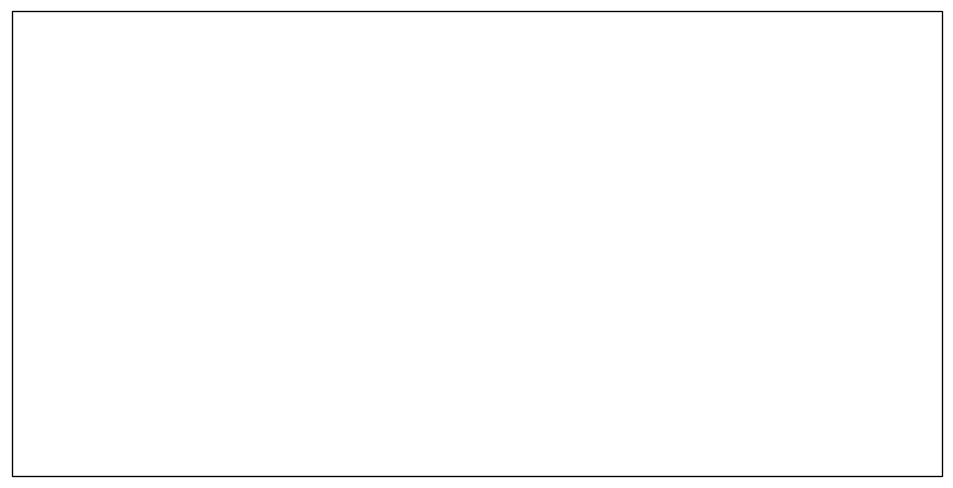

In [16]:
# Use matplotlib to make the figure slightly nicer
fig = plt.figure(figsize=(10,8),dpi=120)
#plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection=crs.PlateCarree())

# Plotting the model field is a one-liner
reference.get_value_as_xarray("discharge").plot(ax=ax, cmap="GnBu")

# Also plot the station location
ax.scatter(Chatly_station_longitude+1, Chatly_station_latitude-0.5, s=25, c="r", label = "Chatly")
ax.scatter(Kerki_station_longitude, Kerki_station_latitude, s=25, c="r", label = "Kerki")
ax.scatter(Tyumen_station_longitude, Tyumen_station_latitude, s=25, c="r", label = "Tyumen")
ax.scatter(Kazalinsk_station_longitude, Kazalinsk_station_latitude, s=25, c="r", label= "Kazalinsk")

# Overlay ocean and coastines
ax.add_feature(cfeature.OCEAN, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.8)
#ax.add_feature(cfeature.RIVERS)
#ax.add_feature(cfeature.RIVERS, zorder=2, color="k")
ax.coastlines(zorder=3)


In [17]:
reference.finalize()

_InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "failed to connect to all addresses; last error: UNKNOWN: ipv4:192.168.2.182:50073: Failed to connect to remote host: Connection refused"
	debug_error_string = "UNKNOWN:Error received from peer  {created_time:"2025-11-07T16:40:08.624810611+01:00", grpc_status:14, grpc_message:"failed to connect to all addresses; last error: UNKNOWN: ipv4:192.168.2.182:50073: Failed to connect to remote host: Connection refused"}"
>

In [18]:

Stations_timeseries.to_csv("Reference_CMIP_5570.csv", index=True)

In [26]:
from ewatercycle.observation.grdc import get_grdc_data
grdc_chatly = get_grdc_data(2817100,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')

grdc_kerki = get_grdc_data(2617110,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')

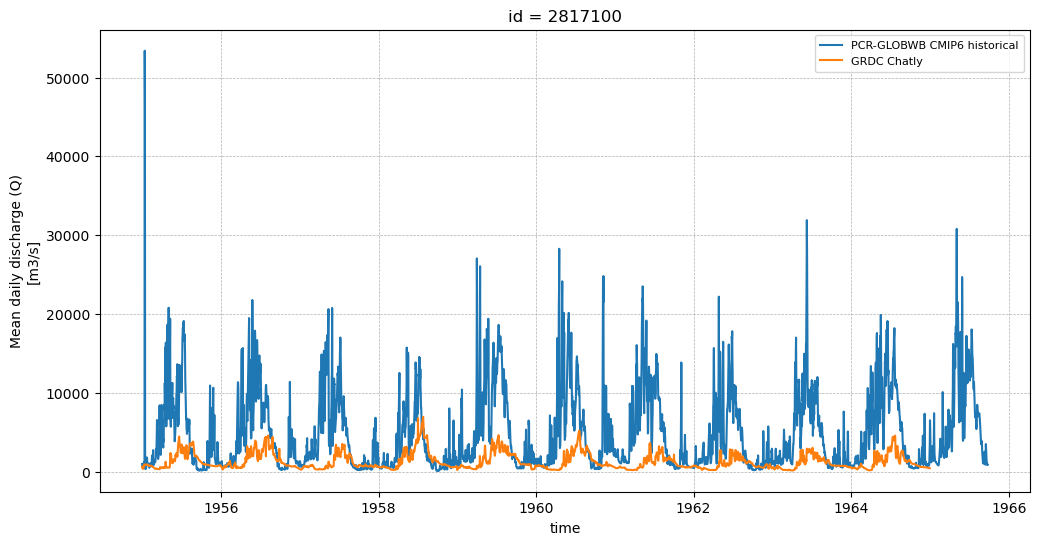

In [25]:
plt.figure(figsize=(12,6))
plt.plot(Stations_timeseries["Chatly"], label = 'PCR-GLOBWB CMIP6 historical')
grdc_chatly['streamflow'].sel(time=slice('1955', '1964')).plot(label='GRDC Chatly')
plt.legend(fontsize=8, markerscale=0.8, frameon=True, borderpad=0.5)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

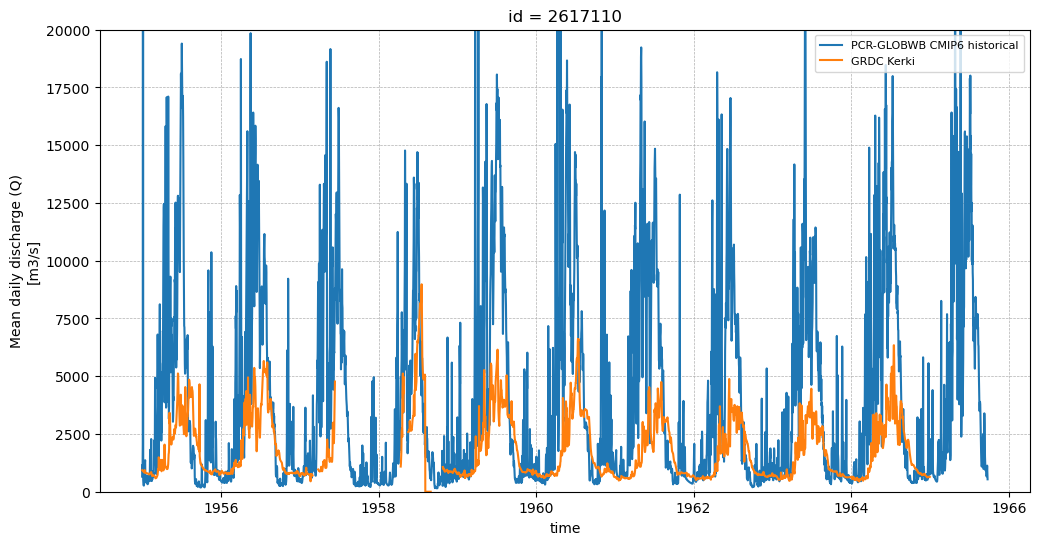

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(Stations_timeseries["Kerki"], label = 'PCR-GLOBWB CMIP6 historical')
grdc_kerki['streamflow'].sel(time=slice('1955', '1964')).plot(label='GRDC Kerki')
plt.legend(fontsize=8, markerscale=0.8, frameon=True, borderpad=0.5)
plt.ylim(0,20000)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)



In [30]:
import ewatercycle.analysis

In [33]:
observations = get_grdc_data(2617110,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/',
                   column = 'GRDC')

observations.GRDC.to_dataframe().head()

,id,GRDC
time,,
1936-01-01,2617110,914.0
1936-01-02,2617110,938.0
1936-01-03,2617110,926.0
1936-01-04,2617110,938.0
1936-01-05,2617110,926.0


In [42]:
obs_1960 = observations.sel(time=slice('1960-01-01', '1960-12-31'))
Stations_timeseries.index = pd.to_datetime(Stations_timeseries.index)


model_1960 = Stations_timeseries.loc['1960']   # all rows in 1960

combined_discharge = pd.DataFrame({
    'GRDC': obs_1960['GRDC'].values,              # or the appropriate column
    'PCRGLOBWB': model_1960['Kerki'].values      # or your model column
}, index=obs_1960.index)  # keep the datetime index

AttributeError: 'Dataset' object has no attribute 'index'

In [38]:
print(observations)

<xarray.Dataset> Size: 316kB
Dimensions:              (time: 19724)
Coordinates:
  * time                 (time) datetime64[ns] 158kB 1936-01-01 ... 1989-12-31
    id                   int64 8B 2617110
Data variables:
    GRDC                 (time) float64 158kB 914.0 938.0 926.0 ... 604.0 583.0
    area                 float64 8B 3.09e+05
    country              <U2 8B 'TM'
    geo_x                float64 8B 65.25
    geo_y                float64 8B 37.83
    geo_z                float64 8B 241.0
    owneroforiginaldata  <U85 340B 'Initial dataset collected in the framewor...
    river_name           <U9 36B 'AMU DARYA'
    station_name         <U5 20B 'KERKI'
    timezone             float64 8B nan
Attributes:
    title:          NA
    Conventions:    CF-1.7
    references:     grdc.bafg.de
    institution:    GRDC
    history:        Converted from 2617110_Q_Day.Cmd.txt of 2025-09-02 to net...
    missing_value:  -999.000

In [36]:
# ewatercycle.analysis.hydrograph(
#     discharge=combined_discharge,
#     reference="GRDC",
# )

combined_discharge = observations[['GRDC']].copy()  # keep as DataFrame
combined_discharge["PCRGLOBWB"] = Stations_timeseries["Kerki"].values  # mak

## no agri

In [ ]:
# scenario_no_agri = ewatercycle.models.PCRGlobWB(
#     parameter_set=parameter_set_cmip_no_agri,
#     forcing=forcing
# )

# print(scenario_no_agri)

PCRGlobWB(
    parameter_set=ParameterSet(
        name='custom_parameter_set',
        directory=PosixPath('/data/shared/parameter-sets/pcrglobwb_global'),
        config=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_i
n_progress/Comparison/Reference_05min_no_agri.ini'),
        doi='N/A',
        target_model='pcrglobwb',
        supported_model_versions={'setters'},
        downloader=None
    ),
    forcing=PCRGlobWBForcing(
        start_time='1935-01-01T00:00:00Z',
        end_time='1940-12-31T00:00:00Z',
        directory=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/wor
k_in_progress/Comparison/forcing_CMIP_3540/AralSeaBasin/CMIP6/future/PCRGlobWB/work/diagnostic/script'),
        shape=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in
_progress/Comparison/forcing_CMIP_3540/AralSeaBasin/CMIP6/future/PCRGlobWB/work/diagnostic/script/AralSeaBasin.shp'
),
        filenames={},
        precipitationNC='pcrglobwb_CMIP6_MPI-ESM1-2-HR_day_historical_r1i1p1f1_pr_gn_1935-1940_AralSeaBasin.nc',
        temperatureNC='pcrglobwb_CMIP6_MPI-ESM1-2-HR_day_historical_r1i1p1f1_tas_gn_1935-1940_AralSeaBasin.nc'
    )
)

In [ ]:
# scenario_no_agri_config, scenario_no_agri_dir = scenario_no_agri.setup(
#     start_time = experiment_start_date,
#     end_time = experiment_end_date,
#     max_spinups_in_years=0
# )
# scenario_no_agri_config, scenario_no_agri_dir

('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Comparison/pcrglobwb_20251106_013358/pcrglobwb_ewatercycle.ini',
 '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Comparison/pcrglobwb_20251106_013358')

In [ ]:


# # Convert ISO 8601 strings to datetime objects
# start_time = datetime.strptime(experiment_start_date, '%Y-%m-%dT%H:%M:%SZ')
# end_time = datetime.strptime(experiment_end_date, '%Y-%m-%dT%H:%M:%SZ')

# # Calculate the number of days for the progression bar
# delta = end_time - start_time
# number_of_days = delta.days
# print(f"Number of days to model: {number_of_days}")

Number of days to model: 2191

In [ ]:
# scenario_no_agri.initialize(scenario_no_agri_config)

In [ ]:
# time = pd.date_range(scenario_no_agri.start_time_as_isostr, scenario_no_agri.end_time_as_isostr)
# # timeseries = pd.DataFrame(
# #     index=pd.Index(time, name="time"), columns=["reference", "experiment1", "experiment2"]
# # )
# # timeseries.head()

In [ ]:
# # Progress bar, since this can take a while
# g = IntProgress(min=0, max=number_of_days) # instantiate the bar
# display(g) # display the bar

# while scenario_no_agri.time < scenario_no_agri.end_time:

#     scenario_no_agri.update()

#     # Track discharge at station location
#     discharge_at_Chatly = scenario_no_agri.get_value_at_coords(
#         "discharge", lat=[Chatly_station_latitude], lon=[Chatly_station_longitude]
#     )
#     time = scenario_no_agri.time_as_isostr
#     Stations_timeseries_experiment_no_agri.loc[time, "Chatly"] = discharge_at_Chatly[0]

#      # Track discharge at station location Kerki
#     discharge_at_Kerki = scenario_no_agri.get_value_at_coords(
#         "discharge", lat=[Kerki_station_latitude], lon=[Kerki_station_longitude]
#     )
#     time = scenario_no_agri.time_as_isostr
#     Stations_timeseries_experiment_no_agri.loc[time, "Kerki"] = discharge_at_Kerki[0]

#     # Track discharge at station Tyumen
#     discharge_at_Tyumen = scenario_no_agri.get_value_at_coords(
#         "discharge", lat=[Tyumen_station_latitude], lon=[Tyumen_station_longitude]
#     )
#     time = scenario_no_agri.time_as_isostr
#     Stations_timeseries_experiment_no_agri.loc[time, "Tyumen"] = discharge_at_Tyumen[0]

#     # Track discharge at station location Karalinsk
#     discharge_at_Kazalinsk = scenario_no_agri.get_value_at_coords(
#         "discharge", lat=[Kazalinsk_station_latitude], lon=[Kazalinsk_station_longitude]
#     )
#     time = scenario_no_agri.time_as_isostr
#     Stations_timeseries_experiment_no_agri.loc[time, "Kazalinsk"] = discharge_at_Kazalinsk[0]


#     g.value += 1

# print("Model run finished!")

IntProgress(value=0, max=2191)

Model run finished!

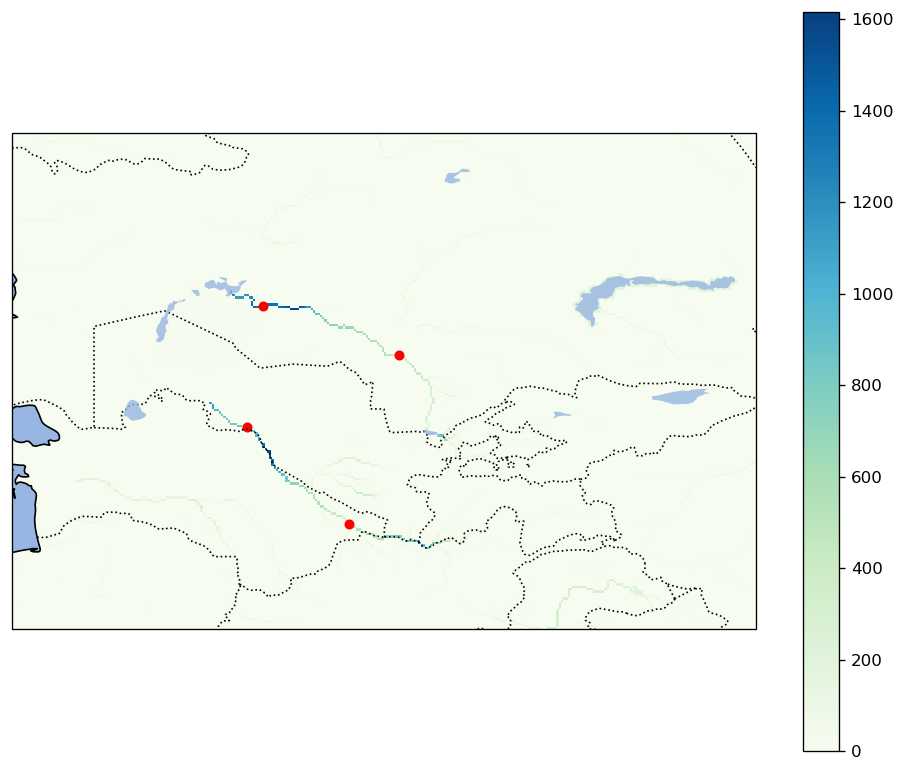

In [ ]:
# # Use matplotlib to make the figure slightly nicer
# fig = plt.figure(figsize=(10,8),dpi=120)
# #plt.figure(figsize=(12,10))
# ax = fig.add_subplot(111, projection=crs.PlateCarree())

# # Plotting the model field is a one-liner
# scenario_no_agri.get_value_as_xarray("discharge").plot(ax=ax, cmap="GnBu")

# # Also plot the station location
# ax.scatter(Chatly_station_longitude+1, Chatly_station_latitude-0.5, s=25, c="r", label = "Chatly")
# ax.scatter(Kerki_station_longitude, Kerki_station_latitude, s=25, c="r", label = "Kerki")
# ax.scatter(Tyumen_station_longitude, Tyumen_station_latitude, s=25, c="r", label = "Tyumen")
# ax.scatter(Kazalinsk_station_longitude, Kazalinsk_station_latitude, s=25, c="r", label= "Kazalinsk")

# # Overlay ocean and coastines
# ax.add_feature(cfeature.OCEAN, zorder=2)
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAKES, alpha=0.8)
# #ax.add_feature(cfeature.RIVERS)
# #ax.add_feature(cfeature.RIVERS, zorder=2, color="k")
# ax.coastlines(zorder=3)


In [ ]:
# scenario_no_agri.finalize()

In [ ]:
# Stations_timeseries_experiment_no_agri.to_csv("Scenario_no_agri_3540.csv", index=True)

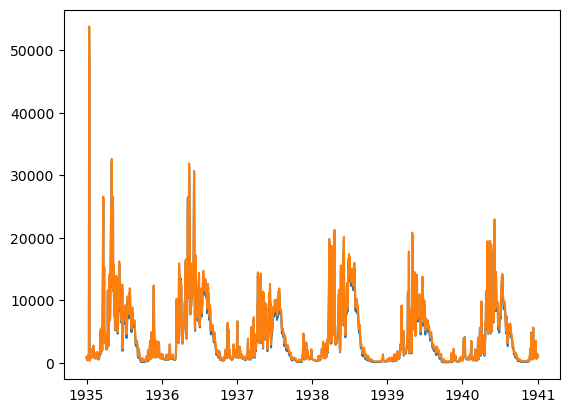

In [ ]:
# plt.plot(Stations_timeseries["Chatly"])
# plt.plot(Stations_timeseries_experiment_no_agri["Chatly"])